In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/IIT Jodhpur/charts/train_val.csv"

In [ ]:
import pandas as pd

df = pd.read_csv(file_path)
df.head()

,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical


In [ ]:
df.type.unique()

array(['vbar_categorical', 'hbar_categorical', 'line', 'pie', 'dot_line'],
      dtype=object)

[Pandas select column with index](https://www.statology.org/pandas-select-column-by-index/)

In [ ]:
df.loc[8,'type']

'vbar_categorical'

In [ ]:
test_dir = "/content/drive/MyDrive/IIT Jodhpur/charts/test"
train_dir = "/content/drive/MyDrive/IIT Jodhpur/charts/train_val"

import os
train_paths = os.listdir(train_dir)
test_paths = os.listdir(test_dir)
print(len(train_paths))
print(len(test_paths))

1000
50


In [ ]:
int(train_paths[1].split(".")[0])

32

In [ ]:
import numpy as np
import cv2
def sort_data(dir, data, df):
    images = []
    labels = []
    for i in range(len(data)):
        img = cv2.imread(os.path.join(dir, data[i]))
        index = int(data[i].split(".")[0])
        label = df.loc[index, 'type']
        labels.append(label)
        images.append(img)
    return np.array(images), np.array(labels)

X_train, Y_train = sort_data(train_dir, train_paths, df)

print(X_train.shape)
print(Y_train.shape)

(1000, 128, 128, 3)
(1000,)


In [ ]:
from sklearn.model_selection import train_test_split
 
x_train, x_validation, y_train, y_validation = train_test_split(
    X_train, 
    Y_train, 
    test_size=200, 
    shuffle=True,
    random_state=42,
    stratify=Y_train
)

print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(800, 128, 128, 3)
(800,)
(200, 128, 128, 3)
(200,)


In [ ]:
X_test, _ = sort_data(test_dir, test_paths, df)
print(X_test.shape)

(50, 128, 128, 3)


In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_validation, return_counts=True))

(array(['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical'],
      dtype='<U16'), array([160, 160, 160, 160, 160]))
(array(['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical'],
      dtype='<U16'), array([40, 40, 40, 40, 40]))


In [ ]:
from sklearn.preprocessing import LabelEncoder
# prepare target

le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_validation_enc = le.transform(y_validation)

print(np.unique(y_train_enc, return_counts=True))
print(np.unique(y_validation_enc, return_counts=True))

(array([0, 1, 2, 3, 4]), array([160, 160, 160, 160, 160]))
(array([0, 1, 2, 3, 4]), array([40, 40, 40, 40, 40]))


In [ ]:
print(y_train[5])
print(np.array(y_train_enc[5]))

vbar_categorical
4


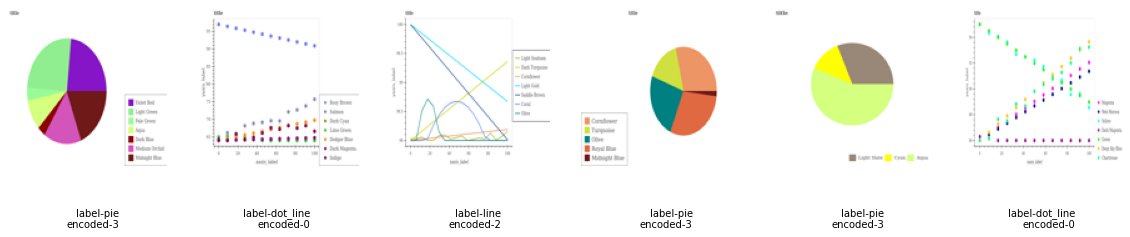

In [ ]:
import matplotlib.pyplot as plt
import cv2
n = np.random.randint(0, 800, 6)
plt.figure(figsize=(20, 4))
for i in range(1, len(n)+1): 
    ax = plt.subplot(1, len(n), i)
    img = x_train[n[i-1]]
    plt.imshow(img)
    # plt.title(Y_train[n[i-1]])
    ax.text(0.7, -0.4, "label-{0}\nencoded-{1}".format(y_train[n[i-1]], y_train_enc[n[i-1]]),
    verticalalignment='bottom', horizontalalignment='right',
    transform=ax.transAxes, fontsize=10)
    plt.axis("off")
plt.show()

In [ ]:
print(y_train.shape)
print(y_validation.shape)

(800,)
(200,)


In [ ]:
print(type(x_train))
print(type(x_validation))
print(type(y_train))
print(type(y_validation))
print(type(y_train_enc))
print(type(y_validation_enc))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# print(f'label: {Y_train[100]}, encoded: {y_train_enc[100]}, categorical: {y_train[100]}')
# print(f'label: {Y_train[170]}, encoded: {y_train_enc[170]}, categorical: {y_train[170]}')
# print(f'label: {Y_train[30]}, encoded: {y_train_enc[30]}, categorical: {y_train[30]}')
# print(f'label: {Y_train[10]}, encoded: {y_train_enc[10]}, categorical: {y_train[10]}')
# print(f'label: {Y_train[60]}, encoded: {y_train_enc[60]}, categorical: {y_train[60]}')

In [ ]:
from enum import Enum
class Number(Enum):
    dot_line = 0
    hbar = 1
    line = 2
    pie = 3
    vbar = 4

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Flatten

# model = Sequential()
# model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(128,128,3)))
# model.add(Conv2D(8, kernel_size=3, activation='relu'))
# model.add(Flatten())
# model.add(Dense(5))

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(128, 128, 3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=10)(inputs)
x = tf.keras.layers.Conv2D(filters=8, kernel_size=5)(x)
x = tf.keras.layers.Flatten()(x)
out = tf.keras.layers.Dense(5)(x)

model = keras.Model(inputs, out)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 119, 32)      9632      
                                                                 
 conv2d_3 (Conv2D)           (None, 115, 115, 8)       6408      
                                                                 
 flatten_1 (Flatten)         (None, 105800)            0         
                                                                 
 dense_1 (Dense)             (None, 5)                 529005    
                                                                 
Total params: 545,045
Trainable params: 545,045
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
history = model.fit(x_train, y_train_enc, batch_size=16, validation_data=(x_validation, y_validation_enc), epochs=4)

Epoch 1/4
50/50 [==============================] - 76s 1s/step - loss: 5529.7031 - sparse_categorical_accuracy: 0.2300 - val_loss: 913.4575 - val_sparse_categorical_accuracy: 0.3000
Epoch 2/4
50/50 [==============================] - 66s 1s/step - loss: 274.7466 - sparse_categorical_accuracy: 0.5387 - val_loss: 11.3780 - val_sparse_categorical_accuracy: 0.7950
Epoch 3/4
50/50 [==============================] - 66s 1s/step - loss: 9.2789 - sparse_categorical_accuracy: 0.8625 - val_loss: 7.8215 - val_sparse_categorical_accuracy: 0.8150
Epoch 4/4
50/50 [==============================] - 69s 1s/step - loss: 0.9763 - sparse_categorical_accuracy: 0.9663 - val_loss: 5.4097 - val_sparse_categorical_accuracy: 0.8600


In [ ]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

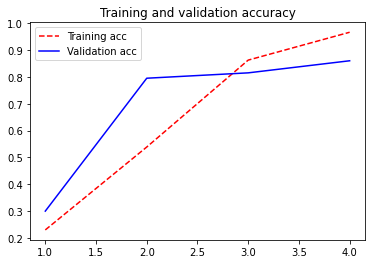

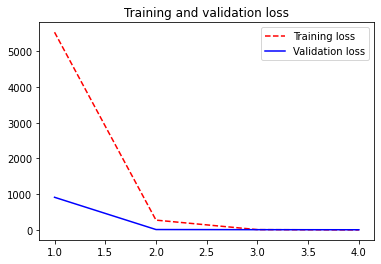

In [ ]:
def plot_accuracy_and_loss(history):
    acc = history.history['sparse_categorical_accuracy']
    val_acc = history.history['val_sparse_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)

In [ ]:
model.save("/content/drive/MyDrive/IIT Jodhpur/models/simple-cnn3")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/IIT Jodhpur/models/simple-cnn3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/IIT Jodhpur/models/simple-cnn3/assets


In [ ]:
prediction = model.predict(X_test[:3])
print(prediction)

[[  68.0452     158.7216     119.48283    -91.22133    862.7721   ]
 [ 160.35751    565.6691     256.43167   -125.03142     92.32791  ]
 [  76.45084     -1.4582683   92.56861   -124.84175    989.0488   ]]


In [ ]:
print(tf.keras.utils.to_categorical( np.argmax(prediction[0]), num_classes=5, dtype='float32'))
print(np.argmax(prediction[0]))

[0. 0. 0. 0. 1.]
4


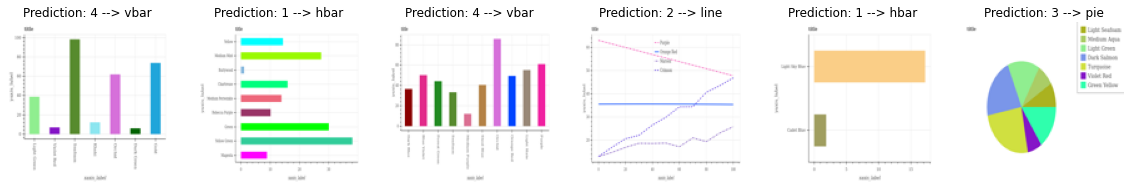

In [ ]:
import numpy as np
prediction = model.predict(X_test[:6])
# print(prediction)

fig=plt.figure(figsize=(20, 4))
n = 6
for i in range(1, n +1):
    ax = fig.add_subplot(1, n, i)

    # actual_label = y_test_enc[i-1]
    prediction_label = np.argmax(prediction[i-1])
    ax.title.set_text('Prediction: {} --> {}'.format(prediction_label, Number(prediction_label).name))
    image = X_test[i-1]
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [ ]:
# import numpy as np
# n = np.random.randint(0, 50, 6)

# fig=plt.figure(figsize=(20, 4))

# for i in range(1, len(n)):
#     ax = fig.add_subplot(1, len(n), i)
#     prediction = model.predict(X_test[n[i-1]])
#     # actual_label = y_test_enc[i-1]
#     prediction_label = np.argmax(prediction)
#     ax.title.set_text('Prediction: {} --> {}'.format(prediction_label, Number(prediction_label).name))
#     image = X_test[n[i-1]]
#     plt.imshow(image)
#     plt.axis("off")
# plt.show()

# X_test[n[0]].shape


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def get_model(units1, units2, units3, units4, lr):
    input = keras.Input(shape=(180, 180, 3))
    x = tf.keras.layers.Conv2D(filters=units1, kernel_size=units2)(inputs)
    x = tf.keras.layers.Conv2D(filters=units3, kernel_size=units4)(x)
    x = tf.keras.layers.Flatten()(x)
    out = tf.keras.layers.Dense(5)(x)

    model = keras.Model(inputs, out)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    )

    return model

def build_model(hp):
    units1 = hp.Int("units1", min_value=15, max_value=50, step=5)
    # dropout1 = hp.Boolean("dropout1")
    units2 = hp.Int("units2", min_value=2, max_value=20, step=2)
    # dropout2 = hp.Boolean("dropout2")
    units3 = hp.Int("units3", min_value=4, max_value=20, step=5)

    units4 = hp.Int("units4", min_value=2, max_value=15, step=2)
    # dropout3 = hp.Boolean("dropout3")
    # dropout4 = hp.Boolean("dropout4")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # activation=hp.Choice("activation", ["relu", "sigmoid"])
    
    model = get_model(units1=units1,
                      units2=units2,
                      units3=units3,
                      units4=units4,
                    #   activation=activation, 
                    #   dropout1=dropout1,
                    #   dropout2=dropout2,
                    #   dropout3=dropout3,
                    #   dropout4=dropout4,
                      lr=lr)
    return model

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=0.98,
    restore_best_weights=True,
)

In [ ]:
!pip install keras-tuner -q

     |████████████████████████████████| 135 kB 28.7 MB/s 


In [ ]:
import keras_tuner
build_model(keras_tuner.HyperParameters())  

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_sparse_categorical_accuracy",
    max_trials=2,
    executions_per_trial=2,
    overwrite=True,
    directory="/content/drive/MyDrive/IIT Jodhpur/models/tuner",
    project_name="cnn-scratch"
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 15, 'max_value': 50, 'step': 5, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 2, 'sampling': None}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 20, 'step': 5, 'sampling': None}
units4 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 15, 'step': 2, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
tuner.search(x_train, y_train_enc,
             epochs=4,
             validation_data=(x_validation, y_validation_enc),
             callbacks=[early_stopping])

Trial 2 Complete [00h 14m 36s]
val_sparse_categorical_accuracy: 0.3675000071525574

Best val_sparse_categorical_accuracy So Far: 0.7150000035762787
Total elapsed time: 00h 17m 23s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit
